In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculate_cost(w, X, y):
    m = X.shape[0]
    J = - (1 / m) * (np.log(sigmoid(X * w)).T * y + np.log(1 - sigmoid(X * w)).T * (1 - y))
    return J

def gradient_descent(initial_w, X, y, alpha = 0.1, maxiter = 10000):
    m = X.shape[0]
    x_axis = []
    i = 0
    w = initial_w
    costs = []
    while i < maxiter:
        w = w - (alpha / m) * X.T * (sigmoid(X * w) - y)
        cost = calculate_cost(w, X, y)
        costs.append(float(cost))
        x_axis.append(i)
        i = i+1
    return w, costs, x_axis

### Altering the dataset to better fit the Logistic Regression Model

In [74]:
filename = input('Enter the name of the Training File: ')
#filename = 'P3train.txt'
train = pd.read_csv(filename, sep = '\t', skiprows=1, names = ['Test1', 'Test2', 'Value','Random'])
train = train[['Test1', 'Test2', 'Value']]

filename = input('Enter the name of the Testing File: ')
#filename = 'P3test.txt'
test = pd.read_csv(filename, sep = '\t', skiprows=1, names = ['Test1', 'Test2', 'Value','Random'])
test = test[['Test1', 'Test2', 'Value']]

Enter the name of the Training File: P3train.txt
Enter the name of the Testing File: P3test.txt


In [75]:
i = 2
temp_train = train.iloc[:,0:1] ** i
temp_test = test.iloc[:,0:1] ** i

train.insert(i-1, 'x1^2', temp_train)
test.insert(i-1, 'x1^2', temp_test)

temp1_train = train.iloc[:,1:2] ** i
temp1_test = test.iloc[:,1:2] ** i

train.insert(i-1, 'x2^2', temp1_train)
test.insert(i-1, 'x2^2', temp1_test)

train.insert(i-1, 'x1^2.x2^2', (train['x1^2'] * train['x2^2']))
test.insert(i-1, 'x1^2.x2^2', (test['x1^2'] * test['x2^2']))

X_train = train.iloc[ : , :-1].values 
y_train = train.iloc[ : , -1:].values

val_1 = np.ones(shape = y_train.shape) 
X_train = np.concatenate((val_1, X_train), 1)

initial_w = np.matrix([np.zeros(X_train.shape[1])]).T

In [76]:
X_test = test.iloc[:, :-1].values
y_test = test.iloc[ : , -1:].values

val_1 = np.ones(shape = y_test.shape)
X_test = np.concatenate((val_1, X_test), 1)

In [77]:
w, costs, x_axis = gradient_descent(initial_w, X_train, y_train, alpha = 0.01, maxiter = 50000)

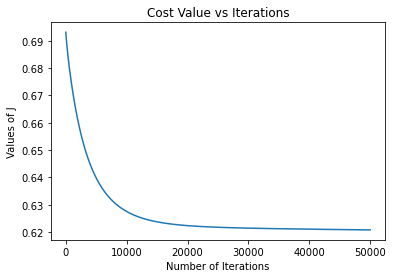

In [78]:
plt.xlabel('Number of Iterations')
plt.ylabel('Values of J')
plt.title('Cost Value vs Iterations')
plt.plot(x_axis, costs)

In [79]:
y_pred = sigmoid(np.dot(w.T, X_test.T))

In [80]:
result_df = pd.DataFrame(columns= ['y_test', 'y_pred', 'label_y_pred'])
result_df['y_test'] = [i[0] for i in y_test]
result_df['y_pred'] = y_pred.tolist()[0]
mask = (result_df.y_pred >= 0.5)
result_df.loc[mask,'label_y_pred'] = 1
mask = (result_df.y_pred < 0.5)
result_df.loc[mask,'label_y_pred'] = 0

In [81]:
tp = len(result_df[(result_df['label_y_pred'] == 1) & (result_df['y_test'] == 1)])
tn = len(result_df[(result_df['label_y_pred'] == 0) & (result_df['y_test'] == 0)])
fp = len(result_df[(result_df['label_y_pred'] == 1) & (result_df['y_test'] == 0)])
fn = len(result_df[(result_df['label_y_pred'] == 0) & (result_df['y_test'] == 1)])

In [82]:
confusion_matrix = pd.DataFrame(columns = ['Actual 1', 'Actual 0'])
confusion_matrix.loc['Predicted 1', 'Actual 1'] = tp
confusion_matrix.loc['Predicted 0', 'Actual 0'] = tn
confusion_matrix.loc['Predicted 1', 'Actual 0'] = fp
confusion_matrix.loc['Predicted 0', 'Actual 1'] = fn

In [83]:
confusion_matrix

,Actual 1,Actual 0
Predicted 1,14,4
Predicted 0,3,12


In [84]:
accuracy = (tp + tn) / (tp+fp+tn+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
temp = (1/recall) + (1/precision)
f1_score = 2 * (1 / temp)

In [85]:
print("Accuracy:",round(accuracy, 2))
print("Precision:",round(precision, 2))
print("Recall:",round(recall, 2))
print("f1_score:",round(f1_score, 2))

Accuracy: 0.79
Precision: 0.78
Recall: 0.82
f1_score: 0.8


In [86]:
print("Initial Cost Function Value\n", costs[0])

Initial Cost Function Value
 0.6931164119203648


In [87]:
print("Final Cost Function Value\n", costs[-1])

Final Cost Function Value
 0.6208088687229996


In [88]:
w

matrix([[ 0.6127617 ],
        [ 0.85311389],
        [-1.60197502],
        [-2.01023484],
        [-2.0881704 ],
        [-0.11393043]])

In [89]:
print('Cost function value for test: ',calculate_cost(w, X_test, y_test))

Cost function value for test:  [[0.55354638]]


In [90]:
train.to_csv('suresh_nikhil_P3Train.txt', sep = '\t', index = False)
test.to_csv('suresh_nikhil_P3Test.txt', sep = '\t', index = False)